In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt

import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [3]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [4]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

***Посмотрим на стационарность ряда рождения девочек. Думаю что этот ряд должен быть стационарен, т.к. ни тренда, ни цикличности в течении года быть не должно, а сезонность мы сейчас посмотрим.***

In [15]:
series1 = pd.read_csv('Series/daily-total-female-births-in-cal.csv')['Count']

In [17]:
series1[:5]

0    35
1    32
2    30
3    31
4    44
Name: Count, dtype: int64

In [19]:
series1[-5:]

360    37
361    52
362    48
363    55
364    50
Name: Count, dtype: int64

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


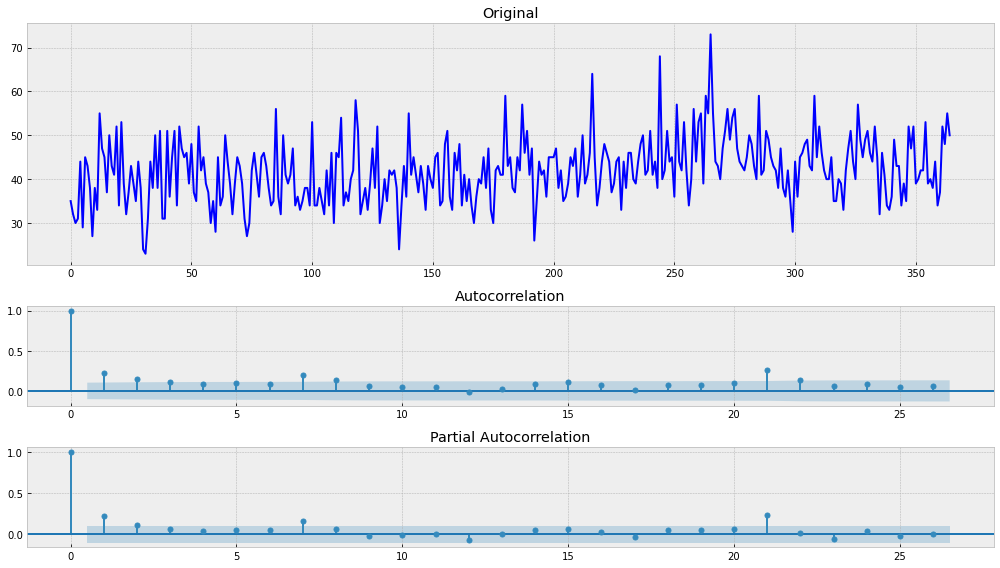

In [20]:
tsplot(series1)

**Видим что тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда. Поэтому делаем вывод что ряд стационарен. Готово :)**

***Посмотрим на индекс Доу-Джонса, это ряд точно должен как минимум иметь явный тренд/тренды.***

In [31]:
series2 = pd.read_csv('Series/weekly-closings-of-the-dowjones-.csv')['Close']

In [32]:
series2[:5], series2[-5:]

(0    890.19
 1    901.80
 2    888.51
 3    887.78
 4    858.43
 Name: Close, dtype: float64,
 157    791.77
 158    787.23
 159    787.94
 160    784.57
 161    752.58
 Name: Close, dtype: float64)

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


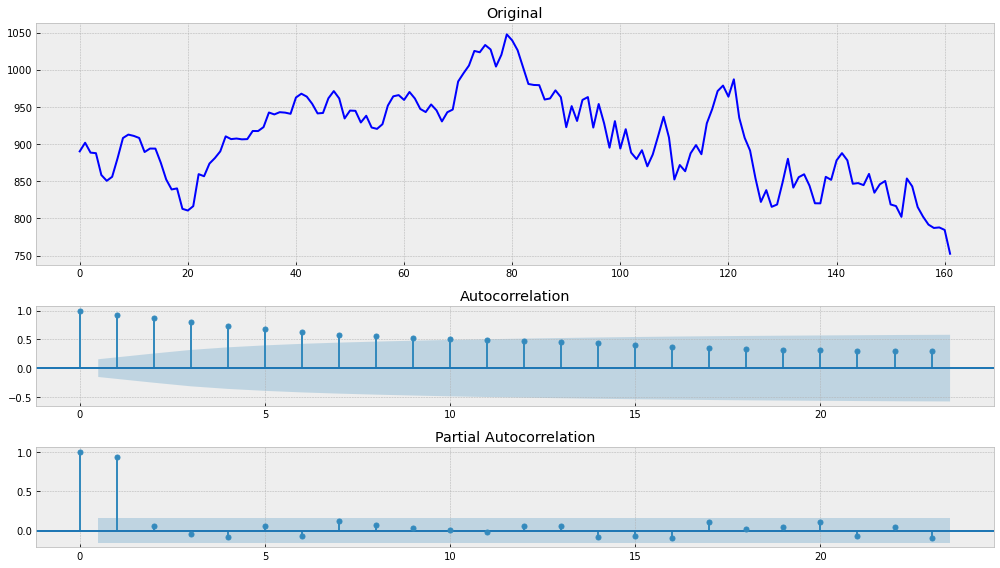

In [33]:
tsplot(series2)

In [34]:
series2 = boxcox(series2, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


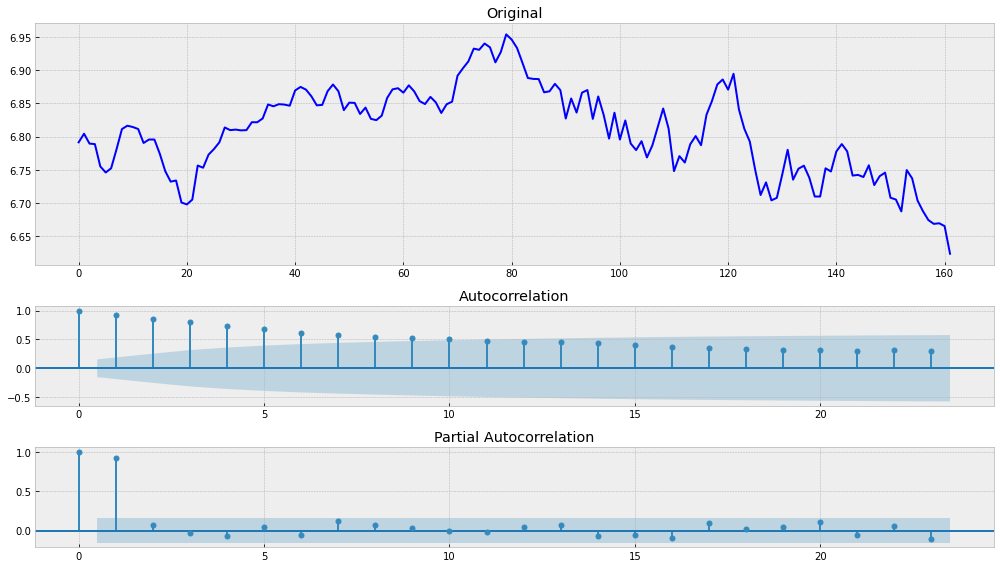

In [35]:
tsplot(series2)

**То что мы уменьшили дисперсию особо не помогло, т.к. значение p-value даже увеличилось и тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда.** 
**Индекс обладает инерционностью, поэтому есть сильная зависимость от предыдущих периодов. Также на графике ряда видно наличие тренда. Уберем их дифференцированием.**

In [36]:
series2 = series2[1:] - series2[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


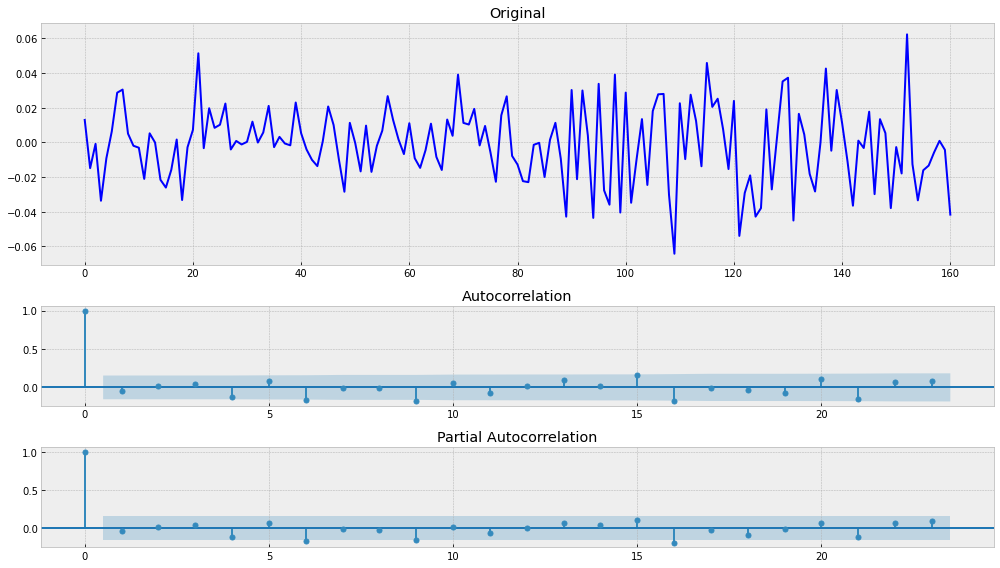

In [37]:
tsplot(series2)

**Видим на графике отсутствие тренда и сезонности, да и p-value ушел практически к нулю.**  
**Теперь второй ряд тоже стационарен**